# Statystyka z Pandas
## Analiza i wizualizacja danych - Pandas, Data Frame
### Rok akad. 2022/2023, WSB w Chorzowe

Pandas udostępnia kilka funkcji i metod statystycznej analizy danych.

In [96]:
#Załadowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# 1. Podstawowe statystyki

Niektóre z najczęściej używanych funkcji statystycznych:

- `decribe()` - zapewnia podsumowanie statystyk ramki danych lub serii, w tym liczbę, średnią, odchylenie standardowe, minimum, maksimum i kwartyle

- `mean()` - oblicza średnią obiektu DataFrame lub Series

- `median()` - oblicza medianę obiektu DataFrame lub Series

- `mode()` - oblicza modę obiektu DataFrame lub Series

- `var()` - oblicza wariancję obiektu DataFrame lub Series

- `std()` - oblicza odchylenie standardowe obiektu DataFrame lub Series

- `corr()` - oblicza korelację między kolumnami DataFrame

- `cov()` - oblicza kowariancję między kolumnami DataFrame

- `quantile()` - oblicza określony kwantyl obiektu DataFrame lub Series

- `skew()` - oblicza skośność obiektu DataFrame lub Series

- `kurtosis()` - oblicza kurtozę obiektu DataFrame lub Series

### Przykład 1. Mediana
Mediana reprezentuje środkową wartość zbioru danych, gdy wartości są sortowane w porządku rosnącym lub malejącym. Aby obliczyć medianę, możemy użyć funkcji `median()`, która zwraca medianę wartości w DataFrame lub Series.

In [18]:
# Utworzenie DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10]})
df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [19]:
# Obliczanie mediany kolumny 'A'
median_A = df['A'].median()
print("Median of column A:", median_A)

# Obliczanie mediany kolumny 'B'
median_B = df['B'].median()
print("Median of column B:", median_B)

# Obliczanie mediany kolumny całej DataFrame
median_df = df.median()
print("Median of the DataFrame:\n", median_df)

Median of column A: 3.0
Median of column B: 8.0
Median of the DataFrame:
 A    3.0
B    8.0
dtype: float64


### Przykład 2. Moda
Moda reprezentuje najczęściej występującą wartość w zbiorze danych. Możemy ją obliczyć tryb za pomocą funkcji `mode()`, która zwraca tryb DataFrame lub Series.

In [27]:
# Utworzenie DataFrame
df = pd.DataFrame({'A': [1, 2, 9, 3, 4, 4], 'B': [5, 6, 6, 7, 8, 8]})

In [28]:
# Obliczanie mody kolumny 'A'
mode_A = df['A'].mode()
print("Mode of column A:", mode_A)

# Obliczanie mody kolumny 'B'
mode_B = df['B'].mode()
print("Mode of column B:", mode_B)


Mode of column A: 0    4
Name: A, dtype: int64
Mode of column B: 0    6
1    8
Name: B, dtype: int64


### Przykład 3. Wariancja
Wariancja jest miarą rozłożenia wartości w zbiorze danych od średniej.  Możemy ją obliczyć za pomocą funkcji `var()`, która zwraca wariancję DataFrame lub Series.

In [33]:
# Utworzenie DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10]})

In [34]:
# Obliczanie wariancji kolumny 'A'
var_A = df['A'].var()
print("Variance of column A:", var_A)

# Obliczanie wariancji kolumny 'B'
var_B = df['B'].var()
print("Variance of column B:", var_B)

# Obliczanie wariancji całego obiektu DataFrame
var_df = df.var()
print("Variance of the DataFrame:\n", var_df)


Variance of column A: 2.5
Variance of column B: 2.5
Variance of the DataFrame:
 A    2.5
B    2.5
dtype: float64


### Przykład 4. Korelacja
Korelacja jest miarą związku między dwiema zmiennymi. Możemy obliczyć korelację między kolumnami DataFrame za pomocą funkcji `corr()`, która zwraca macierz korelacji.

In [59]:
# Utworzenie DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10], 'C': [11, 12, 13, 14, 15]})

In [60]:
# Obliczanie korelacji pomiędzy kolumnami 'A' i 'B'
corr_AB = df['A'].corr(df['B'])
print("Correlation between columns A and B:", corr_AB)

# Obliczanie korelacji pomiędzy kolumnami dla całego obiektu DataFrame
corr_matrix = df.corr()
print("Correlation matrix:\n", corr_matrix)


Correlation between columns A and B: 0.9999999999999999
Correlation matrix:
      A    B    C
A  1.0  1.0  1.0
B  1.0  1.0  1.0
C  1.0  1.0  1.0


### Przykład 5. Kowariancja
Kowariancja jest miarą wspólnej zmienności dwóch zmiennych losowych. Możemy obliczyć kowariancję między kolumnami DataFrame za pomocą funkcji `cov()`, która zwraca macierz kowariancji.

In [61]:
# Utworzenie DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10], 'C': [11, 12, 13, 14, 15]})


In [62]:
# Obliczanie kowariancji pomiędzy kolumnami 'A' i 'B'
cov_AB = df['A'].cov(df['B'])
print("Covariance between columns A and B:", cov_AB)

# Obliczanie kowariancji pomiędzy kolumnami dla całego obiektu DataFrame
cov_matrix = df.cov()
print("Covariance matrix:\n", cov_matrix)


Covariance between columns A and B: 2.5
Covariance matrix:
      A    B    C
A  2.5  2.5  2.5
B  2.5  2.5  2.5
C  2.5  2.5  2.5


### Przykład 6. Odchylenie standardowe
Odchylenie standardowe jest miarą ilości zmienności lub rozproszenia zbioru wartości. Jest to pierwiastek kwadratowy z wariancji i jest wyrażony w tych samych jednostkach co dane. Wyższe odchylenie standardowe wskazuje na większą zmienność danych, podczas gdy niższe odchylenie standardowe wskazuje na mniejszą zmienność. W Pandas możemy obliczyć odchylenie standardowe DataFrame lub Series za pomocą funkcji `std()`, która zwraca odchylenie standardowe danych.

In [69]:
# Utworzenie Series
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
# Obliczanie odchylenia standardowego
std = s.std()
print("Standard deviation:", std)


Standard deviation: 2.7386127875258306


### Przykład 7. Kwantyle
Kwantyl jest wartością, która dzieli zbiór danych na grupy o równej wielkości, np. mediana jest kwantylem, który dzieli zbiór danych na dwie równej wielkości grupy. W Pandas możemy obliczyć kwantyle za pomocą funkcji `quantile()`, która zwraca wartość określonego kwantyla dla DataFrame lub Series.

![wykres-pudelkowy.jpg](https://www.statystyka-zadania.pl/wp-content/uploads/2013/12/wykres-pude%C5%82kowy.png)

In [63]:
# Utworzenie DataFrame
s = pd.Series([1, 2, 3, 4, 5])

In [64]:
# Obliczanie mediany (Q2)
median = s.quantile(0.5)
print("Median:", median)

# Obliczanie kwantylu 0.25 (kwantyl dolny Q1)
p25 = s.quantile(0.25)
print("25th percentile:", p25)

# Obliczanie kwantylu 0.75 (kwantyl górny Q3)
p75 = s.quantile(0.75)
print("75th percentile:", p75)


Median: 3.0
25th percentile: 2.0
75th percentile: 4.0


### Przykład 8. Skośność
Skośność jest miarą asymetrii rozkładu prawdopodobieństwa. Mówimy, że rozkład jest skośny, jeśli nie jest symetryczny. Dodatnia skośność wskazuje, że ogon po prawej stronie rozkładu jest dłuższy lub grubszy niż lewa strona, podczas gdy ujemna skośność wskazuje, że ogon po lewej stronie jest dłuższy lub grubszy niż prawa strona.

W Pandas możemy obliczyć skośność DataFrame lub Series za pomocą funkcji `skew()`, która zwraca skośność danych.

![skosnosc.jpg](https://www.predictivesolutions.pl/uploads/blog/Kurtoza/wykres_1-newB.png)

In [65]:
# Utworzenie DataFrame
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
# Obliczanie skośności, 0 - rozkład symetryczny
skewness = s.skew()
print("Skewness:", skewness)

Skewness: 0.0


### Przykład 9. Kurtoza
Kurtoza jest miarą „wysokości” lub „płaskości” rozkładu prawdopodobieństwa w stosunku do rozkładu normalnego. Rozkład z dodatnią kurtozą ma ostrzejszy pik i cięższe ogony niż rozkład normalny, podczas gdy rozkład z ujemną kurtozą ma bardziej płaski pik i jaśniejsze ogony niż rozkład normalny.

W Pandas możemy obliczyć kurtozę DataFrame lub Series za pomocą funkcji  `kurtosis()`, która zwraca kurtozę danych.

![kurtoza.jpg](https://statystycznie-istotne.pl/wp-content/uploads/2017/02/kurtoza2.png)

In [67]:
# Utworzenie DataFrame
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
# Obliczanie kurtozy, 0 - dla rozkładu normalnego
kurtosis = s.kurtosis()
print("Kurtosis:", kurtosis)


Kurtosis: -1.1999999999999997


# 2. Rozkład normalny

Rozkład normalny (Gaussa) to ciągły rozkład prawdopodobieństwa opisujący prawdopodobieństwo przyjęcia przez zmienną losową zakresu wartości. Rozkład normalny jest symetryczny i ma kształt dzwonu, przy czym większość danych skupia się wokół wartości średniej, a ogony rozkładu rozciągają się w nieskończoność.

Rozkład normalny charakteryzuje się dwoma parametrami: średnią (μ) i odchyleniem standardowym (σ). Średnia jest środkiem rozkładu, a odchylenie standardowe kontroluje rozkład danych. Funkcja gęstości prawdopodobieństwa (PDF) rozkładu normalnego jest określona następującym wzorem:

`f(x) = (1 / (σ * sqrt(2π))) * exp(-((x - μ)^2 / (2 * σ^2)))`

gdzie x to zmienna losowa, μ to średnia, σ to odchylenie standardowe, π to stała matematyczna pi, a exp() to funkcja wykładnicza.

![kurtoza.jpg](https://1.bp.blogspot.com/-_p-_y6szOwc/YX00dQ7CIEI/AAAAAAAADEo/3kmXeXA3DMIaD3AFI9k_hRySmF9hW5xiACLcBGAsYHQ/s664/BLOG%2BKurtoza%2BAnatomia%2Brozk%25C5%2582adu.png)

Rozkład normalny jest szeroko stosowany w analizie statystycznej i modelowaniu, a wiele zjawisk naturalnych i zestawów danych można aproksymować za pomocą rozkładu normalnego. Jest również podstawą wielu testów statystycznych i przedziałów ufności, takich jak test t.

Aby utworzyć rozkład normalny w Pandas, możemy użyć funkcji `numpy.random.normal()` w celu wygenerowania tablicy liczb losowych z rozkładem normalnym, a następnie utworzyć z tej tablicy DataFrame.

In [ ]:
# Wygenerowanie tablicy liczb losowych o rozkładzie normalnym
data = np.random.normal(loc=0.0, scale=1.0, size=1000)
# loc - średnia rozkładu
# scale - odchylenie standardowe
# size - liczba wylosowanych liczb losowych

In [71]:
# Utworzenie DataFrame z tablicy numpy
df = pd.DataFrame(data, columns=['values'])

# Wyświetlenie kilku pierwszych wierszy
print(df.head())


     values
0 -0.943200
1  0.773147
2  1.349575
3 -0.041653
4  0.350314


In [72]:
print(df.describe())

            values
count  1000.000000
mean      0.001324
std       1.000336
min      -3.934353
25%      -0.648929
50%       0.013671
75%       0.640206
max       2.882171


array([[<AxesSubplot: title={'center': 'values'}>]], dtype=object)

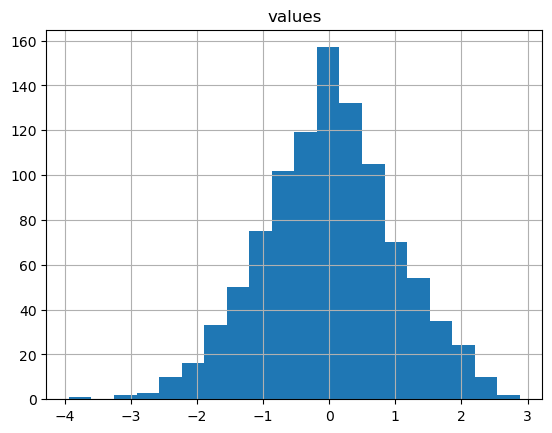

In [73]:
# Wyrysowanie histogramu
df.hist(bins=20)
# bins - zakres wartości na przedziały

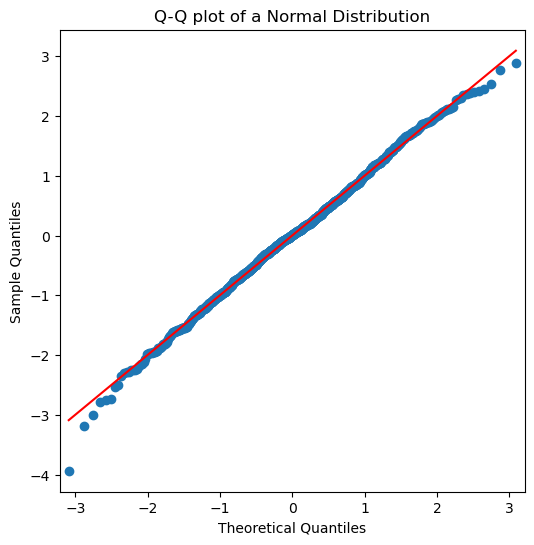

In [75]:
# Wyrysowanie wykresu Q-Q
fig, ax = plt.subplots(figsize=(6, 6))
qqplot(data, line='s', ax=ax)
# line='s' - wyrysowanie prostej dla porównania

# Opis wykresu
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.set_title('Q-Q plot of a Normal Distribution')

plt.show()

### Jak sprawdzić typ rozkładu naszych danych?

Istnieje wiele metod sprawdzania typu dystrybucji zestawu danych. Oto kilka typowych metod:

- Histogram - jest graficzną reprezentacją rozkładu częstotliwości zbioru danych. Patrząc na kształt histogramu, często można zorientować się, jaki jest typ rozkładu. Na przykład, jeśli histogram ma krzywą w kształcie dzwonu, rozkład może być normalny

- Wykres kwantylowo-kwantylowy (Q-Q)- to graficzna metoda porównywania rozkładu zbioru danych z rozkładem teoretycznym. Jeśli punkty na wykresie leżą blisko linii prostej, zbiór danych prawdopodobnie będzie zgodny z rozkładem teoretycznym

- Skośność i kurtoza - to miary kształtu rozkładu. Rozkład normalny ma skośność 0 i kurtozę 3. Jeśli skośność jest dodatnia, rozkład jest skośny w prawo, a jeśli skośność jest ujemna, rozkład jest skośny w lewo. Jeśli kurtoza jest większa niż 3, rozkład ma więcej wartości ekstremalnych niż rozkład normalny, a jeśli kurtoza jest mniejsza niż 3, rozkład ma mniej wartości ekstremalnych

- Test Shapiro-Wilka - to test statystyczny sprawdzający, czy zbiór danych ma rozkład normalny. Jeśli wartość p testu jest mniejsza niż 0,05, zbiór danych nie ma rozkładu normalnego

UWAGA: ważne jest, aby użyć wielu metod do potwierdzenia typu dystrybucji, ponieważ różne metody mogą dawać różne wyniki. Np. test Shapiro-Wilka nie zawsze jest wystarczająco silny, aby wykryć odchylenia od normalności, szczególnie w przypadku małych próbek. Dlatego zaleca się uzupełnienie tego testu wizualną inspekcją danych, taką jak histogramy lub wykresy Q-Q, aby sprawdzić założenia dotyczące normalności.

# 3. Centralne twierdzenie graniczne

Centralne twierdzenie graniczne jest podstawową koncepcją w statystyce. Mówi ono, że:

- jeśli będziemy losować z populacji wiele próbek, to rozkład średnich z tych próbek będzie zbliżony do rozkładu normalnego, nawet jeśli rozkład danej właściwości w populacji nie ma rozkładu normalnego

- średnia z tych średnich będzie taka sama lub bardzo zbliżona do średniej w populacji

- wartość błędu standardowego z tego rozkładu będzie tym mniejsza, im większe będą losowane próbki

Innymi słowy, jeśli weźmiesz wystarczająco dużą próbkę z dowolnego rozkładu ze skończoną średnią i wariancją, średnia próbki będzie miała rozkład normalny. 

![kurtoza.jpg](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhcuum9bD6kDLzRH_nndIcvLVE1yvlReAtR9KgT_YkUwRtLkQl6nMu9dcU7CaRgAUpuEBl37AkUH7JPSSuevLfMYSmA5mocwgcJT3HjYK3U-HwmPNa8OWYduOGHzHHcv_Xx4noOF-utlX0c730nxay3XrH0FRBQuDHM2I796saYhg73i2bHb_XEZg/s1920/BLOG%20CTG%20trzy%20rozk%C5%82ady.png)


Centralne twierdzenie graniczne jest niezwykle przydatne we wnioskowaniu statystycznym i testowaniu hipotez, ponieważ pozwala nam przyjmować założenia dotyczące populacji na podstawie rozkładu średnich z próby. Jest ono również ważne, ponieważ pomaga wyjaśnić, dlaczego wiele rzeczywistych zjawisk można modelować za pomocą rozkładu normalnego, nawet jeśli poszczególne obserwacje nie mają rozkładu normalnego.

Przykład z życia:

Chcemy poznać średni wzrost wszystkich studentów na uniwersytecie. Wybieramy losowo próbę 100 uczniów i mierzymy ich wzrost, a następnie obliczamy średnią wzrostu w próbie.

Zgodnie z centralnym twierdzeniem granicznym, wraz ze wzrostem wielkości próby rozkład średnich próby zbliża się do rozkładu normalnego. Jeśli więc powtórzyć ten proces wiele razy, za każdym razem wybierając losowo inną próbę 100 uczniów i obliczając średni wzrost, rozkład tych średnich utworzyłby krzywą w kształcie dzwonu, przy czym większość średnich skupiłaby się wokół rzeczywistego średni wzrost populacji.

Pozwala to na wnioskowanie statystyczne o średnim wzroście populacji w oparciu o średni wzrost z próby, przy użyciu narzędzi takich jak przedziały ufności i testowanie hipotez.

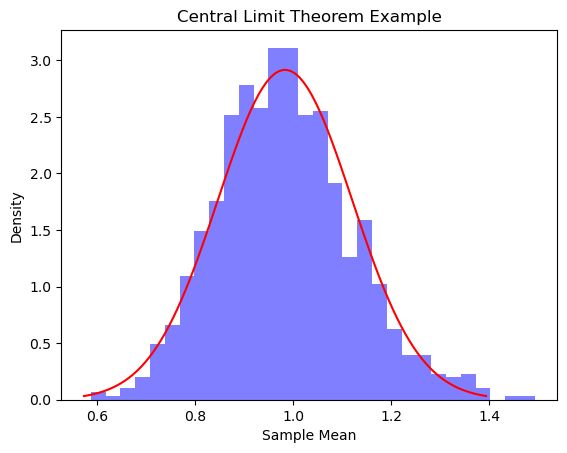

In [87]:
# Przykład

# Wygenerowanie losowych danych z rozkładu innego niż normalny (wykładniczy)
data = np.random.exponential(size=1000)

# Utworzenie listy do przechowywania przykładowych średnich
means = []

# Wybór 1000 próbek o rozmiarze 50 i obliczenie średnich
for i in range(1000):
    sample = np.random.choice(data, size=50, replace=True)
    means.append(sample.mean())

# Wyrysowanie histogramu średnich z próby
plt.hist(means, bins=30, density=True, alpha=0.5, color='blue')

# Wyrysowanie rozkładu normalnego z taką samą średnią i wariancją jak średnie z próby
mu = np.mean(means)
sigma = np.std(means)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='red')

# Opis wykresu
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Central Limit Theorem Example')

plt.show()


# 4. Testy statystyczne

Testy statystyczne to metody stosowane do analizowania danych i wyciągania wniosków na temat populacji na podstawie próby. Testy te można wykorzystać do określenia, czy istnieje znacząca różnica między dwiema grupami, czy istnieje związek między dwiema zmiennymi lub czy obserwowany efekt jest prawdopodobnie spowodowany przypadkiem. 

Istnieje wiele różnych rodzajów testów statystycznych, z których każdy ma swój własny cel i założenia, np.:

- Test Shapiro-Wilka jest często używany w testowaniu hipotez i analizie danych w celu określenia, czy parametryczne testy statystyczne, takie jak test t lub ANOVA, są odpowiednie dla danego zestawu danych. Jeśli okaże się, że dane nie mają rozkładu normalnego, bardziej odpowiednie mogą być testy nieparametryczne, takie jak test U Manna-Whitneya lub test Kruskala-Wallisa

- Testy t są używane do porównywania średnich dwóch grup danych ciągłych

- ANOVA (Analiza wariancji) jest używana do porównywania średnich z więcej niż dwóch grup ciągłych danych

### Test Shapiro - Wilka

Test został opracowany przez Samuela Shapiro i Martina Wilka w 1965 roku. Jest to test statystycznym służącym do określenia, czy dany zbiór danych ma rozkład normalny, czy nie. 

Test polega na porównaniu obserwowanego rozkładu danych z oczekiwanym rozkładem danych przy założeniu, że rozkład danych jest normalny. Hipotezą zerową testu jest to, że dane mają rozkład normalny, a hipotezą alternatywną jest to, że dane nie mają rozkładu normalnego:

H0: dane mają rozkład normalny

HA: dane nie mają rozkładu normalnego

Test Shapiro-Wilka jest odpowiedni dla małych próbek (zazwyczaj mniej niż 50). W przypadku większych próbek odpowiednie mogą być inne testy, np. test Andersona-Darlinga lub test Kołmogorowa-Smirnowa.

In [93]:
# Utworzenie DataFrame
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10]
})

# Implementacja testu Shapiro-Wilk na kolumnie A
# UWAGA: funkcji shapiro() można używać tylko do testowania pojedynczej kolumny na raz
# Aby przetestować wiele kolumn, używamy pętli lub metody apply()
stat, p = shapiro(data['A'])

print(f"Test statistic: {stat:.4f}, p-value: {p:.4f}")


Test statistic: 0.9868, p-value: 0.9672


Interpretacja testu Shapiro-Wilka:

Porównujemy wartości p-value uzyskanej w teście z określonym z góry poziomem istotności alfa (zwykle 0,05) w celu ustalenia, czy odrzucamy lub nie odrzucamy hipotezy zerowej.

Jeśli wartość p-value jest większa niż wybrany poziom alfa, to nie możemy odrzucić hipotezy zerowej, co oznacza, że dane mają rozkład normalny. Jeśli wartość p jest mniejsza lub równa poziomowi alfa, odrzucamy hipotezę zerową, co oznacza, że dane nie mają rozkładu normalnego.

### Test t

Test t jest testem statystycznym używanym do określenia, czy istnieje istotna różnica między średnimi dwóch grup danych. Jest to test hipotezy, który porównuje średnie z dwóch próbek w celu sprawdzenia, czy różnią się one znacząco od siebie, biorąc pod uwagę wielkość próby i wariancję. Jest to test parametryczny, w którym zakłada się, że dane mają rozkład normalny i że wariancje dwóch próbek są równe (w przypadku testu t próbek niezależnych). Test t służy do porównywania średnich z dwóch próbek, ale może być również używany do testowania różnicy między średnią próbki a znaną średnią populacji.

UWAGA: Nie można porównywać ze sobą kilku grup, wykonując kilkukrotnie test t-Studenta.

Test t polega na obliczeniu wartości t, która jest wyprowadzana z różnicy między średnimi z dwóch grup i błędu standardowego różnicy:

`t = (x1 - x2) / (s / sqrt(n))`

- x1 i x2 to średnie z dwóch próbek 
- (s / sqrt(n)) to błąd standardowy różnicy
- s to odchylenie standardowe połączonych próbek 
- n to wielkość próby 

Wartość t porównuje się z wartością krytyczną z rozkładu t o pewnym stopniu swobody, który zależy od wielkości próby i wybranego poziomu istotności alfa (zwykle 0,05), w celu określenia, czy istnieje znacząca różnica między średnimi z dwóch próbek.

Istnieją dwa główne typy testów t: test t dla prób niezależnych i dla prób sparowanych. Test t dla próbek niezależnych porównuje średnie dwóch niezależnych grup, test t dla próbek sparowanych porównuje średnie dwóch zależnych lub sparowanych grup.

Przykład z życia: 

Chcemy ustalić, czy istnieje znacząca różnica w średnim wzroście mężczyzn i kobiet w populacji. Zbieramy losową próbę 50 mężczyzn i 50 kobiet i mierzymy ich wzrost w centymetrach.

Naszą hipotezą zerową byłoby, że średni wzrost kobiet i mężczyzn jest równy, podczas gdy naszą hipotezą alternatywną byłoby, że średni wzrost mężczyzn i kobiet nie jest równy.

Następnie przeprowadzilibyśmy test t niezależnych próbek, aby ustalić, czy średni wzrost mężczyzn i kobiet znacznie się różni. Jeśli obliczona wartość t jest większa niż wartość krytyczna na wybranym poziomie istotności (np. 0,05), odrzucilibyśmy hipotezę zerową i stwierdzilibyśmy, że istnieje znacząca różnica średniego wzrostu między mężczyznami i kobietami. Jeśli obliczona wartość t jest mniejsza niż wartość krytyczna, nie odrzucilibyśmy hipotezy zerowej i nie stwierdzilibyśmy, że nie ma znaczącej różnicy w średnim wzroście między mężczyznami i kobietami.

In [95]:
# Utworzenie dwóch próbek danych
data1 = pd.Series([1, 2, 3, 4, 5])
data2 = pd.Series([6, 7, 8, 9, 10])

# Implementacja testu t (dla niezależnych próbek)
t, p = ttest_ind(data1, data2)

print("t-value:", t)
print("p-value:", p)


t-value: -5.0
p-value: 0.001052825793366539


Interpretacja testu t:

Wartość p-value reprezentuje prawdopodobieństwo uzyskania wartości t jako ekstremalnej lub bardziej ekstremalnej niż obserwowana wartość t, przy założeniu, że że hipoteza zerowa jest prawdziwa.

Wyniki testu t możemy interpretować, porównując wartość p z wybranym poziomem istotności alfa (np. 0,05). Jeśli wartość p-value jest mniejsza niż poziom istotności, możemy odrzucić hipotezę zerową i stwierdzić, że istnieje znacząca różnica między średnimi z dwóch grup. Jeśli wartość p-value jest większa niż poziom istotności, nie możemy odrzucić hipotezy zerowej i stwierdzić, że nie ma istotnej różnicy między średnimi z dwóch grup.

Jeśli obliczona wartość t jest większa niż wartość krytyczna, możemy odrzucić hipotezę zerową i stwierdzić, że istnieje znacząca różnica między średnimi z dwóch grup. Jeśli obliczona wartość t jest mniejsza niż wartość krytyczna, nie możemy odrzucić hipotezy zerowej i stwierdzić, że nie ma istotnej różnicy między średnimi z dwóch grup.    

### ANOVA

ANOVA oznacza analizę wariancji. Jest to metoda statystyczna używana do sprawdzania, czy średnie dwóch lub więcej grup są równe, czy nie.

Test ANOVA polega na porównaniu wariancji między grupami (różnice średnich między grupami) z wariancją wewnątrz grup (zmienność każdej indywidualnej grupy). Jeśli wariancja między grupami jest większa niż wariancja wewnątrz grup, to prawdopodobne jest, że średnie grup nie są równe i istnieje między nimi znacząca różnica.

ANOVA może jedynie powiedzieć, czy istnieją znaczące różnice między grupami, ale nie mówi, które konkretne czynniki lub zmienne powodują te różnice. Dodatkowo ANOVA zakłada, że dane mają rozkład normalny i równe wariancje między grupami.

Istnieje kilka różnych typów testów ANOVA, w tym jednokierunkowa ANOVA, dwukierunkowa ANOVA i ANOVA z powtarzanymi pomiarami. Wybór testu ANOVA do zastosowania zależy od pytania badawczego i projektu badania. 

ANOVA pozwala naukowcom określić, czy istnieją znaczące różnice między wieloma grupami, co może pomóc w podejmowaniu decyzji dotyczących interwencji terapeutycznych lub manipulacji eksperymentalnych.

Przykład z życia: 
    
Chcemy sprawdzić, czy istnieje różnica w średnich wynikach trzech różnych grup badawczych w teście z matematyki. Te trzy grupy to: grupa kontrolna, która nie otrzymała żadnej interwencji, grupa, która otrzymała przewodnik do nauki i grupa, która otrzymała indywidualne korepetycje. Każda grupa liczyła 30 uczestników.

Aby przeprowadzić ANOVA, najpierw obliczamy średni wynik dla każdej grupy:

Średnia grupy kontrolnej: 75
Średnia grupy z przewodnikiem: 85
Średnia grupy korzystającej z korepetycji: 90

Obliczmy również wariancję w obrębie każdej grupy i wariancję między grupami.

Jeśli wariancja między grupami jest znacznie większa niż wariancja wewnątrz grup, to istnieje znacząca różnica w średnich wynikach trzech grup. W takim przypadku możemy przeprowadzić dodatkowe testy statystyczne, aby określić, które grupy istotnie różnią się od siebie.

In [98]:
# Utworzenie próbek danych
data = {'group': ['control', 'control', 'control', 'treatment', 'treatment', 'treatment', 'new_treatment', 'new_treatment', 'new_treatment'], 
        'score': [70, 80, 75, 90, 85, 95, 88, 92, 90]}
df = pd.DataFrame(data)

# Implementacja modelu ANOVA
# Używamy funkcji ols() w celu dopasowania modelu ANOVA do danych metodą najmniejszych kwadratów (OLS)
# Grupa jako zmienna predykcyjna jakościowa i ocena jako zmienna zależna
model = ols('score ~ C(group)', data=df).fit()

# Test ANOVA
#Argument typ=2 określa, że chcemy użyć metody sumy kwadratów typu II, 
# Jest ona często zalecana w przypadku interakcji między zmiennymi predykcyjnymi
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


          sum_sq   df     F    PR(>F)
C(group)   450.0  2.0  12.5  0.007251
Residual   108.0  6.0   NaN       NaN


Interpretacja ANOVA:

Podczas przeprowadzania ANOVA celem jest ustalenie, czy istnieją znaczące różnice między średnimi dwóch lub więcej grup. Dane wyjściowe testu ANOVA zazwyczaj obejmują statystykę F, stopnie swobody i wartość p w celu ustalenia, czy istnieje znacząca różnica między średnimi porównywanych grup.

Statystyka F mierzy stosunek wariancji między grupami do wariancji wewnątrz grup. Jeśli statystyka F jest duża, a wartość p-value jest mała (zwykle mniejsza niż 0,05), sugeruje to, że istnieje znacząca różnica między średnimi grup.